In [1]:
# pip install pandas
# pip install tensorflow
# pip install matplotlib
# pip install -U scikit-learn
# pip install --upgrade keras tensorflow

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils import shuffle

In [3]:

# data = pd.read_csv("Train_Test_Network.csv")
# #將資料空格刪除
# data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# #創建 LabelEncoder 物件
# label_encoder = LabelEncoder()
# #labeling
# data['service'] = data['service'].map({"-":0,})
# data['dns_query'] = data['dns_query'].map({"-":0,})
# data['dns_AA'] = data['dns_AA'].map({"-":0,})
# data['dns_RD'] = data['dns_RD'].map({"-":0})
# data['dns_RA'] = data['dns_RA'].map({"-":0,})
# data['dns_rejected'] = data['dns_rejected'].map({"-":0,})
# data['ssl_version'] = data['ssl_version'].map({"-":0,})
# data['ssl_cipher'] = data['ssl_cipher'].map({"-":0,})
# data['ssl_resumed'] = data['ssl_resumed'].map({"-":0,})
# data['ssl_established'] = data['ssl_established'].map({"-":0,})
# data['ssl_subject'] = data['ssl_subject'].map({"-":0,})
# data['ssl_issuer'] = data['ssl_issuer'].map({"-":0,})
# data['http_trans_depth'] = data['http_trans_depth'].map({"-":0,})
# data['http_method'] = data['http_method'].map({"-":0,})
# data['http_uri'] = data['http_uri'].map({"-":0,})
# data['http_version'] = data['http_version'].map({"-":0,})
# data['http_orig_mime_types'] = data['http_orig_mime_types'].map({"-":0,})
# data['http_resp_mime_types'] = data['http_resp_mime_types'].map({"-":0,})
# data['weird_name'] = data['weird_name'].map({"-":0,})
# data['weird_addl'] = data['weird_addl'].map({"-":0,})
# data['weird_notice'] = data['weird_notice'].map({"-":0,})
# data['weird_name'] = data['weird_name'].map({"-":0,})
# # 將目標變量進行編碼（如果是字串形式）
# data['ts'] = label_encoder.fit_transform(data['ts'])
# data['src_ip'] = label_encoder.fit_transform(data['src_ip'])
# data['src_port'] = label_encoder.fit_transform(data['src_port'])
# data['dst_ip'] = label_encoder.fit_transform(data['dst_ip'])
# data['dst_port'] = label_encoder.fit_transform(data['dst_port'])
# data['proto'] = label_encoder.fit_transform(data['proto'])
# data['service'] = label_encoder.fit_transform(data['service'])
# data['duration'] = label_encoder.fit_transform(data['duration'])
# data['src_bytes'] = label_encoder.fit_transform(data['src_bytes'])
# data['dst_bytes'] = label_encoder.fit_transform(data['dst_bytes'])
# data['conn_state'] = label_encoder.fit_transform(data['conn_state']) 
# data['missed_bytes'] = label_encoder.fit_transform(data['missed_bytes'])
# data['src_pkts'] = label_encoder.fit_transform(data['src_pkts'])
# data['src_ip_bytes'] = label_encoder.fit_transform(data['src_ip_bytes'])
# data['dst_pkts'] = label_encoder.fit_transform(data['dst_pkts'])
# data['dst_ip_bytes'] = label_encoder.fit_transform(data['dst_ip_bytes'])
# data['dns_query'] = label_encoder.fit_transform(data['dns_query'])
# data['dns_qclass'] = label_encoder.fit_transform(data['dns_qclass'])
# data['dns_qtype'] = label_encoder.fit_transform(data['dns_qtype'])
# data['dns_rcode'] = label_encoder.fit_transform(data['dns_rcode'])
# data['dns_AA'] = label_encoder.fit_transform(data['dns_AA'])
# data['dns_RD'] = label_encoder.fit_transform(data['dns_RD'])
# data['dns_RA'] = label_encoder.fit_transform(data['dns_RA'])
# data['dns_rejected'] = label_encoder.fit_transform(data['dns_rejected'])
# data['ssl_version'] = label_encoder.fit_transform(data['ssl_version'])
# data['ssl_cipher'] = label_encoder.fit_transform(data['ssl_cipher'])
# data['ssl_resumed'] = label_encoder.fit_transform(data['ssl_resumed'])
# data['ssl_established'] = label_encoder.fit_transform(data['ssl_established'])
# data['ssl_subject'] = label_encoder.fit_transform(data['ssl_subject'])
# data['ssl_issuer'] = label_encoder.fit_transform(data['ssl_issuer'])
# data['http_trans_depth'] = label_encoder.fit_transform(data['http_trans_depth'])
# data['http_method'] = label_encoder.fit_transform(data['http_method'])
# data['http_uri'] = label_encoder.fit_transform(data['http_uri'])
# data['http_version'] = label_encoder.fit_transform(data['http_version'])
# data['http_request_body_len'] = label_encoder.fit_transform(data['http_request_body_len'])
# data['http_response_body_len'] = label_encoder.fit_transform(data['http_response_body_len'])
# data['http_response_body_len'] = label_encoder.fit_transform(data['http_response_body_len'])
# data['http_status_code'] = label_encoder.fit_transform(data['http_status_code'])
# data['http_user_agent'] = label_encoder.fit_transform(data['http_user_agent'])
# data['http_orig_mime_types'] = label_encoder.fit_transform(data['http_orig_mime_types'])
# data['http_resp_mime_types'] = label_encoder.fit_transform(data['http_resp_mime_types'])
# data['weird_name'] = label_encoder.fit_transform(data['weird_name'])
# data['weird_addl'] = label_encoder.fit_transform(data['weird_addl'])
# data['weird_notice'] = label_encoder.fit_transform(data['weird_notice'])
# data['label'] = label_encoder.fit_transform(data['label'])
# # 對type進行one hot(因為type有多種類別)
# one_hot = pd.get_dummies(data["type"],prefix="type")
# data.pop("type")
# data = data.join(one_hot)
# # data.to_csv('Network_processed_data.csv', index=False) 


In [4]:
# data['type'] = data['type'].map({"backdoor":0,"ddos":1,"dos":2,"injection":3,"mitm":4,"normal":5,"password":6,"ransomware":7,"scanning":8,"xss":9})
# data.to_csv('SvmData.csv', index=False)

In [7]:
data = pd.read_csv("C:/Users/USER/Desktop/Program/NetWorkPython/Network_processed_data.csv")
for i in range (10):
    data = shuffle(data)

In [8]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
data.head(10)

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,...,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type_backdoor,type_ddos,type_dos,type_injection,type_mitm,type_normal,type_password,type_ransomware,type_scanning,type_xss
223421,76314,4602,29645,1508,51,2,1,577,48,35,10,0,1,41,1,34,1,1,1,3,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,False
73529,38977,4601,3068,3839,651,2,1,0,0,0,6,0,1,70,0,0,1,1,4,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
221770,76299,4602,25581,1520,78,1,1,41542,154,1355,10,0,10,532,8,1668,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,False
380917,99148,4614,47767,3921,938,2,0,0,0,0,6,0,1,22,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
441778,111153,4598,37593,1527,800,1,0,241,0,0,1,0,1,7,1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,False,False,False,False,False,False,False,False,False
44864,25958,4590,22706,1511,910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
152081,73736,4602,31203,1511,747,1,0,4431,0,0,1,0,1,5,1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,True,False
346429,94180,4600,53363,1531,866,1,1,7326,124,2280,10,0,5,294,7,2955,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
59638,32725,4614,33819,3921,938,2,0,0,0,0,6,0,1,22,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False
208970,76239,4602,35674,1508,51,2,1,31,68,71,10,0,2,88,2,98,1,1,6,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,True,False,False,False,False,False,False


In [9]:
#拿出資料90%當作訓練集
par = np.random.rand(len(data)) < 0.9
data_train = data[par]
#剩下的當作test集
data_test = data[~par]
train_data = data.values
test_data = data.values

#前44列的資料進行訓練
X_train = train_data[:,0:44]
X_train =X_train.astype(float)
#第5列之後為目標變量
Y_train = train_data[:,44:]
Y_train =Y_train.astype(float)
#前4列為測試集
X_test = test_data[:,0:44]
X_test =X_test.astype(float)

#第5列之後為訓練目標變量
Y_test = test_data[:,44:]
Y_test =Y_test.astype(float)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("=============")
print(X_train.dtype)
print(Y_test.dtype)

(461043, 44)
(461043, 10)
(461043, 44)
(461043, 10)
float64
float64


In [ ]:
#自訂模型
model = Sequential()
#輸入層
model.add(Dense(32, input_dim=44, activation="ReLU"))
#隱藏層(ReLU函數)
model.add(Dense(128, activation="ReLU"))
model.add(Dense(64, activation="ReLU"))
# model.add(Dense(32, activation="ReLU"))
#輸出層(softmax函數)
model.add(Dense(10, activation="softmax"))
#檢測模型狀態 
model.summary()  
# 編譯模型(利用adam優化器)
model.compile(loss="categorical_crossentropy", optimizer="Adam",metrics=["accuracy"])
# 訓練模型
print("Training ...")
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=13, batch_size=200)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 32)                1440      
                                                                 
 dense_81 (Dense)            (None, 128)               4224      
                                                                 
 dense_82 (Dense)            (None, 64)                8256      
                                                                 
 dense_83 (Dense)            (None, 10)                650       
                                                                 
Total params: 14570 (56.91 KB)
Trainable params: 14570 (56.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training ...
Epoch 1/13
2075/2075 [==============================] - 3s 1ms/step - loss: 49.9115 - accuracy: 0.7110 - val_loss: 12.2116 - val_accurac

# 使用訓練資料預測分類

In [ ]:
# 使用訓練資料預測分類
predicted = model.predict(X_train)


14408/14408 [==============================] - 5s 341us/step


In [ ]:
# 顯示訓練成果(分數)
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

14408/14408 [==============================] - 6s 401us/step - loss: 0.0765 - accuracy: 0.9785
訓練資料集的準確度 = 0.98
14408/14408 [==============================] - 6s 407us/step - loss: 0.0765 - accuracy: 0.9785
測試資料集的準確度 = 0.98


In [ ]:
Y_pred = predicted

Y_pred = np.argmax(Y_pred, axis=1).astype(int)
Y_test_2 = np.argmax(Y_test, axis=1).astype(int)

from sklearn.metrics import multilabel_confusion_matrix

#row=Y_test_2 col=Y_pred
cm=confusion_matrix(Y_test_2,Y_pred)
print(cm)

[[ 19945      0      0      0      0     49      0      6      0      0]
 [     0  19162      9    513      0    315      1      0      0      0]
 [     0     85  19547     46      0    301      0      0     21      0]
 [     0   1413     58  18226      0    303      0      0      0      0]
 [     7      0      0      0    773    228      0     16      0     19]
 [   656    172    100     46     56 295804    442    818    194   1712]
 [     0      0      0      0      0    270  19706      0      0     24]
 [   123      0      0      0      0     51      0  19826      0      0]
 [     0     30    514    141      0    988      0      0  18327      0]
 [     7      0      0      0      0    195      0      0      0  19798]]


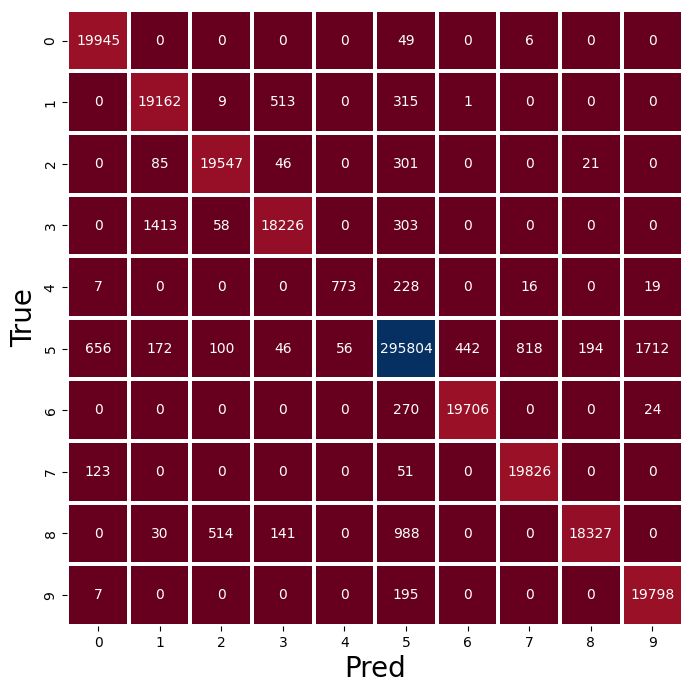

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()

In [ ]:
# knn_model = KNeighborsClassifier(n_neighbors = 10, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
# accuracy = cross_val_score(knn_model, X_test, Y_test, cv=10, scoring="accuracy")
# print(accuracy)
# print(accuracy.mean()*100,'%')
#可以從accuracy串列中，看到有些組是100%，有些組則是大概90%，也就是說如果我們剛好取的是第一組，
#就會誤以為模型準確度(Accuracy)一定是100%，但實際上只是剛好取到這樣的資料組合